<a href="https://colab.research.google.com/github/Jaysons-s/DataSctructures/blob/main/Arbol_AVL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


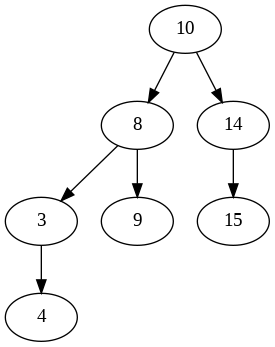

In [7]:

!apt-get install graphviz -y
!pip install graphviz

import graphviz

class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.key = key
        self.height = 1

class AVLTree:
    def insert(self, root, key):
        if not root:
            return Node(key)
        elif key < root.key:
            root.left = self.insert(root.left, key)
        else:
            root.right = self.insert(root.right, key)

        root.height = 1 + max(self.getHeight(root.left), self.getHeight(root.right))
        balance = self.getBalance(root)

        # Balance the tree
        if balance > 1 and key < root.left.key:
            return self.rightRotate(root)
        if balance < -1 and key > root.right.key:
            return self.leftRotate(root)
        if balance > 1 and key > root.left.key:
            root.left = self.leftRotate(root.left)
            return self.rightRotate(root)
        if balance < -1 and key < root.right.key:
            root.right = self.rightRotate(root.right)
            return self.leftRotate(root)

        return root

    def leftRotate(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = 1 + max(self.getHeight(z.left), self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left), self.getHeight(y.right))
        return y

    def rightRotate(self, z):
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        z.height = 1 + max(self.getHeight(z.left), self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left), self.getHeight(y.right))
        return y

    def getHeight(self, root):
        return root.height if root else 0

    def getBalance(self, root):
        return self.getHeight(root.left) - self.getHeight(root.right) if root else 0

    def generate_graph(self, node, dot=None):
        if dot is None:
            dot = graphviz.Digraph()
            dot.node(str(node.key), str(node.key))

        if node.left:
            dot.node(str(node.left.key), str(node.left.key))
            dot.edge(str(node.key), str(node.left.key))
            self.generate_graph(node.left, dot)

        if node.right:
            dot.node(str(node.right.key), str(node.right.key))
            dot.edge(str(node.key), str(node.right.key))
            self.generate_graph(node.right, dot)

        return dot

# Ejemplo de uso
if __name__ == "__main__":
    tree = AVLTree()
    root = None
    for value in [10, 8, 14, 9, 15, 3, 18]:
        root = tree.insert(root, value)

    # Generar el gráfico y guardarlo como PNG
    dot = tree.generate_graph(root)
    dot.render("arbol_avl", format="png", cleanup=True)  # Cambia a False si deseas conservar el archivo .dot

    # Mostrar la imagen (si estás en un entorno que lo permita)
    from IPython.display import Image
    display(Image(filename='arbol_avl.png'))
